In [2]:
# system tools
import os
import sys
sys.path.append(os.path.join("../../.."))

# pandas, numpy, gensim
import pandas as pd
import numpy as np
import gensim.downloader

# import classifier utility functions from Ross' repo
import utils.classifier_utils as clf

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Embedding, 
                                     Flatten, GlobalMaxPool1D, Conv1D)
from tensorflow.keras.optimizers import SGD, Adam #Adam = optimerings algoritme
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import L2

# matplotlib
import matplotlib.pyplot as plt

In [3]:
def plot_history(H, epochs):
    
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [4]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [5]:
os.getcwd()

'/home/cds-au579253/cds-language/Homework/Assignment6/src'

In [8]:
def main():
    
    #Defining filepath
    filepath = '../Data/Game_of_Thrones_Script.csv'
    
    #Reading csv file as data frame.
    dataframe = pd.read_csv(filepath)
    
    #Creating np arrays based on the dataframe with the sentence, season and names data.
    sentences = dataframe["Sentence"].values
    seasons = dataframe["Season"].values
    names = dataframe["Name"].values
    
    #Creating test and training data
    X_train, X_test, y_train, y_test = train_test_split(sentences,
                                                        seasons,
                                                        test_size=0.25,
                                                        random_state=42)
    
    
    vectorizer = CountVectorizer()
      
    
    # First we do it for our training data...
    X_train_feats = vectorizer.fit_transform(X_train)
    #... then we do it for our test data
    X_test_feats = vectorizer.transform(X_test)
    # We can also create a list of the feature names. 
    feature_names = vectorizer.get_feature_names()
    
    
    #EBT: fitting the model.
    classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)
    
    y_pred = classifier.predict(X_test_feats)
    
    
    classifier_metrics = metrics.classification_report(y_test, y_pred)
    print(classifier_metrics)
     
    clf.plot_cm(y_test, y_pred, normalized=True)
    plt.savefig("../Output/actual_and_predicted.png")
    
    # Vectorize full dataset
    X_vect = vectorizer.fit_transform(sentences)

    # initialise cross-validation method
    title = "Learning Curves (Logistic Regression)"
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    # run on data
    model = LogisticRegression(random_state=42)
    clf.plot_learning_curve(model, title, X_vect, seasons, cv=cv, n_jobs=4)
    plt.savefig("../Output/three_plots.png")

/home/cds-au579253/cds-language/sentiment_environment/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

    Season 1       0.30      0.31      0.31       772
    Season 2       0.26      0.33      0.29      1001
    Season 3       0.23      0.27      0.25       917
    Season 4       0.25      0.28      0.26       869
    Season 5       0.23      0.21      0.22       748
    Season 6       0.22      0.17      0.19       703
    Season 7       0.35      0.27      0.31       605
    Season 8       0.25      0.13      0.17       363

    accuracy                           0.26      5978
   macro avg       0.26      0.25      0.25      5978
weighted avg       0.26      0.26      0.26      5978



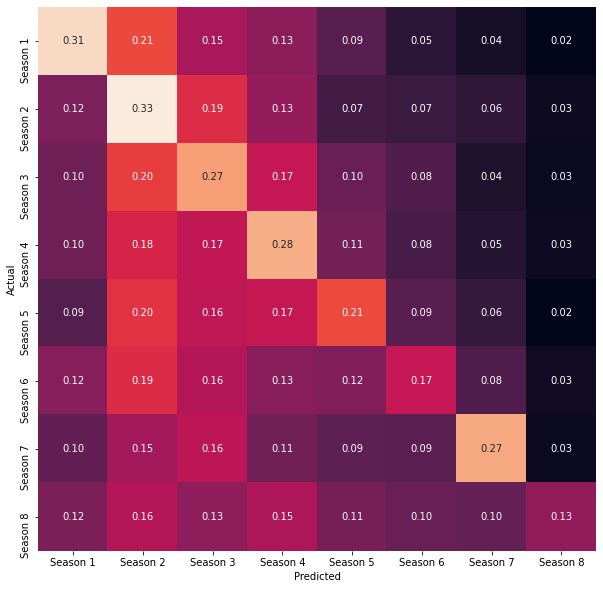

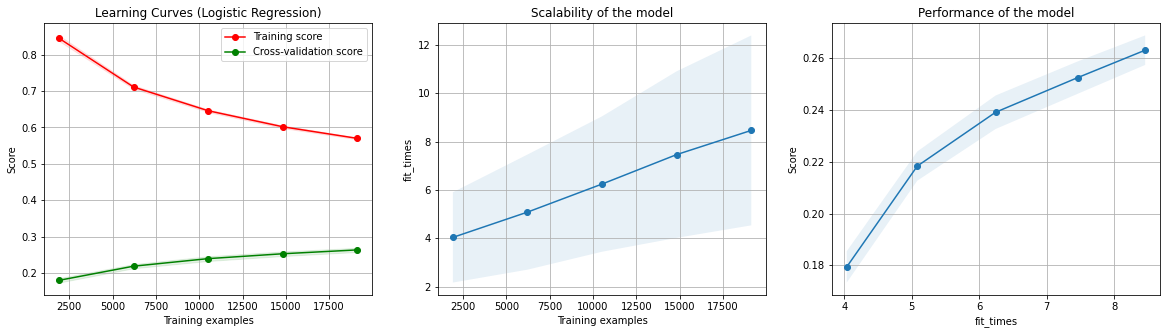

<Figure size 432x288 with 0 Axes>

In [9]:
if __name__ =='__main__':
    main()